# TECH CHALLENGE GRUPO 07
---

## Integrantes:
- Alexandre Sampaio - RM:365877
- Carlos Henrique de Castro Verçosa Albuquerque - RM: 366486
- Gustavo Leite - RM: 365725
- Vinicius Bittencourt do Santos Pagano - RM: 366496


# DataSet escolhido
- https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data

# 1. ANÁLISE EXPLORATÓRIA DE DADOS
---



## Download da base que iremos usar

In [1]:
import kagglehub

path = kagglehub.dataset_download("oktayrdeki/heart-disease")

print("Path do dataset:", path)

100%|████████████████████| 568k/568k [00:00<00:00, 930kB/s]

Extracting files...
Path do dataset: /Users/alexandresampaio/.cache/kagglehub/datasets/oktayrdeki/heart-disease/versions/1


## Carregamento do dataset

In [2]:
import pandas as pd
import os

file_path = os.path.join(path, 'heart_disease.csv')
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
display(df.head(5))


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## Dataset
É composto por 10.000 registros e 21 variáveis, abrangendo tanto atributos numéricos quanto categóricos. As informações envolvem aspectos da saúde, como idade, sexo, pressão arterial, colesterol, hábitos de vida e histórico clínico. A variável de interesse principal é o “Heart Disease Status”, que aponta se a pessoa apresenta ou não algum tipo de problema cardíaco.



In [4]:
print(f"Formato do dataset (linhas, colunas): {df.shape}\n")
print("Tipos de dados:\n")
print(df.dtypes)
print("\n")
print("Info dos dados:\n")
print(df.info())
print("\n")


Formato do dataset (linhas, colunas): (10000, 21)

Tipos de dados:

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


Info dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age         

## Informações das variáveis
Saber o tipo e as informações de var que vamos trabalhar ajuda pois algumas colunas podem estar com o tipo errado ou não serem obrigatorias (ex: números como strings)


In [5]:
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_cols)
print("\n")
print("Values by Columns:")
print("\n")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Categorical Columns: Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')


Values by Columns:


Gender: ['Male' 'Female' nan]
Exercise Habits: ['High' 'Low' 'Medium' nan]
Smoking: ['Yes' 'No' nan]
Family Heart Disease: ['Yes' 'No' nan]
Diabetes: ['No' 'Yes' nan]
High Blood Pressure: ['Yes' 'No' nan]
Low HDL Cholesterol: ['Yes' 'No' nan]
High LDL Cholesterol: ['No' 'Yes' nan]
Alcohol Consumption: ['High' 'Medium' 'Low' nan]
Stress Level: ['Medium' 'High' 'Low' nan]
Sugar Consumption: ['Medium' 'Low' 'High' nan]
Heart Disease Status: ['No' 'Yes']


### Análise da Variável Alvo (`heart_disease_status`)

Uma análise fundamental em qualquer problema de classificação é entender a distribuição da variável alvo. No nosso caso, a variável alvo é `heart_disease_status`, que indica se um paciente tem ou não uma doença cardíaca.

A variável alvo 'Heart Disease Status' apresenta um desbalanceamento significativo. A maioria dos registros (8000 ou 80%) pertence à classe 'No' (não ter doença cardíaca), enquanto apenas uma minoria (2000 ou 20%) pertence à classe 'Yes' (ter doença cardíaca)




Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64


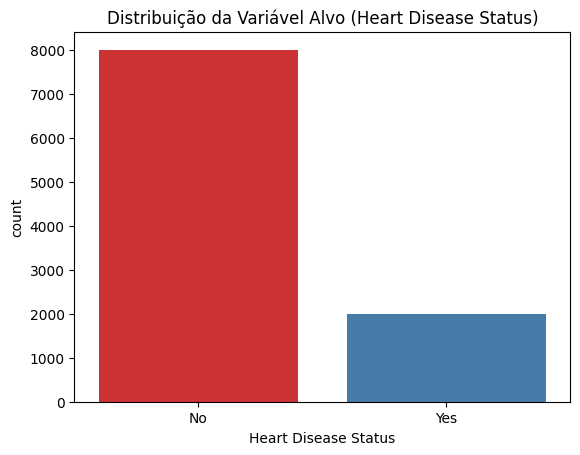

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Heart Disease Status'].value_counts())

sns.countplot(x='Heart Disease Status', data=df, hue='Heart Disease Status', palette='Set1', legend=False)
plt.title('Distribuição da Variável Alvo (Heart Disease Status)')
plt.show()

## Verificar valores ausentes/duplicados

É essencial para identificar lacunas nos dados, entender sua distribuição e definir estratégias de tratamento, como remoção, imputação ou substituição. Isso garante maior qualidade e consistência na análise.

In [9]:
print("\nValores ausentes por coluna:\n")
print(df.isnull().sum())
print("\nValores duplicados:\n")
print(df.duplicated().sum())


Valores ausentes por coluna:

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

Valores duplicados:

0


## Visualização do gráfico de contagem para variáveis categóricas
Permite entender a distribuição das categorias, identificar desequilíbrios e detectar possíveis anomalias nos dados. Isso facilita decisões durante a limpeza e modelagem.

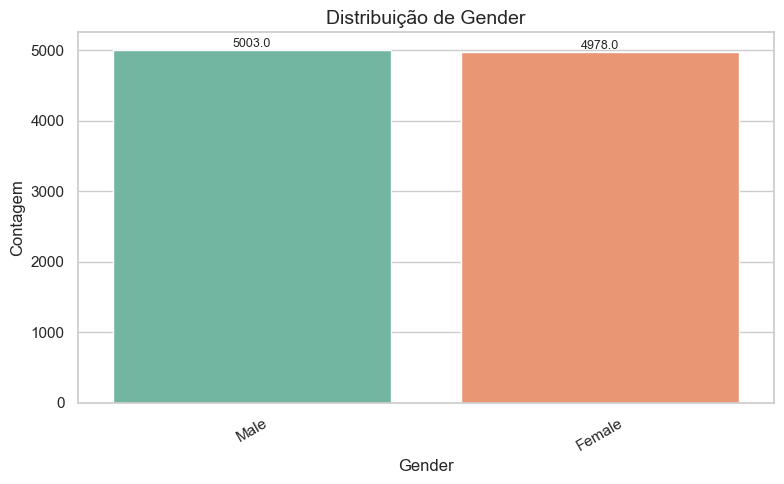

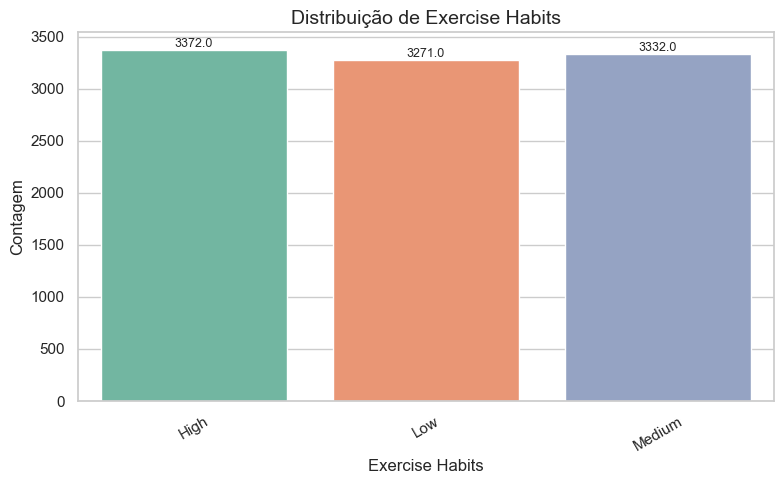

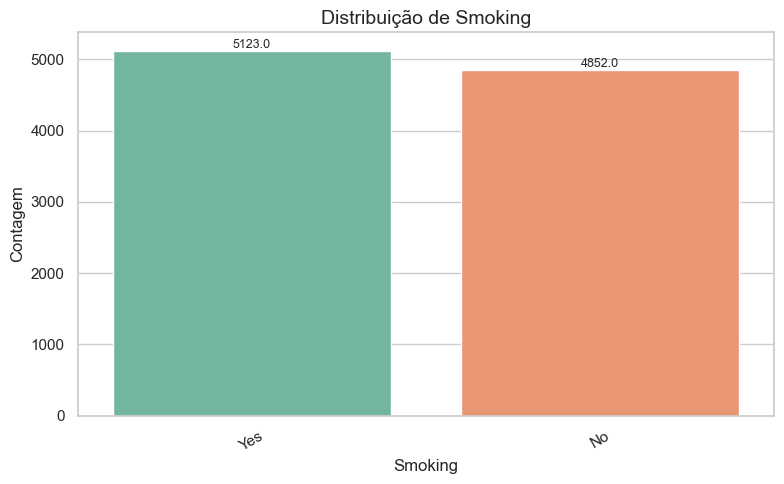

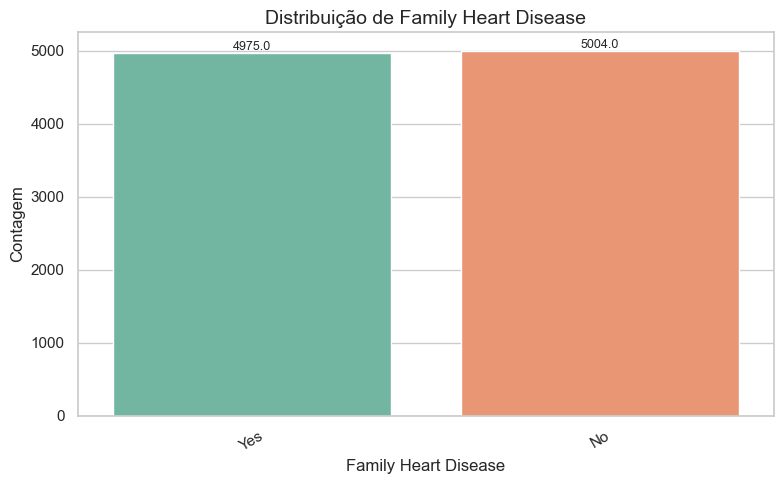

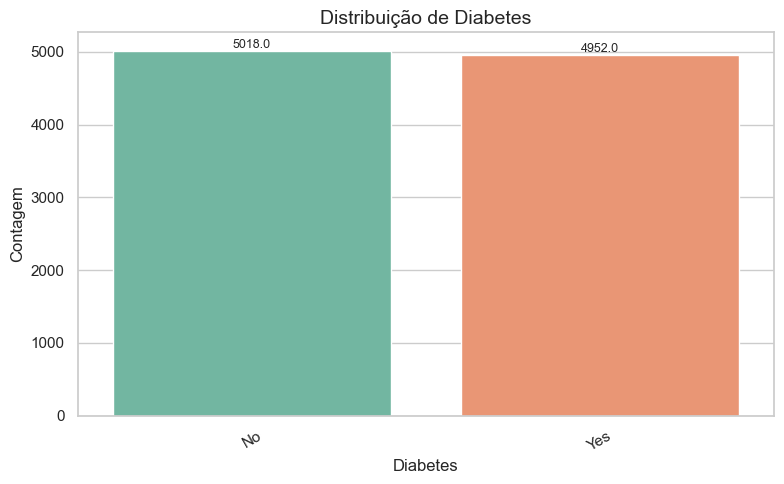

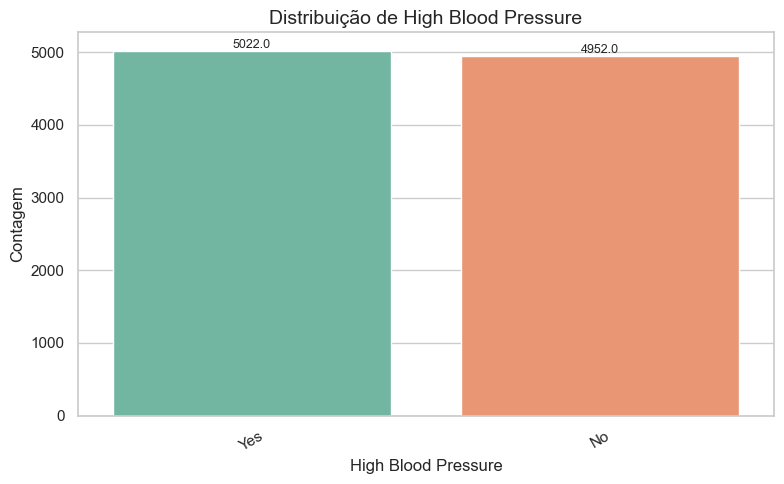

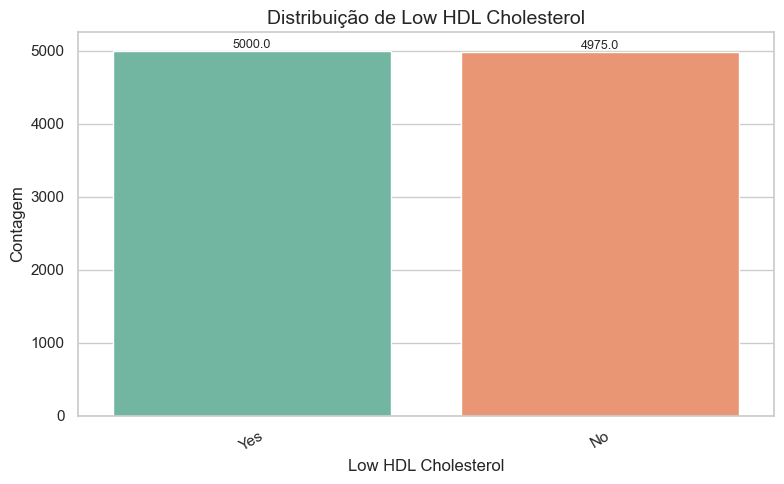

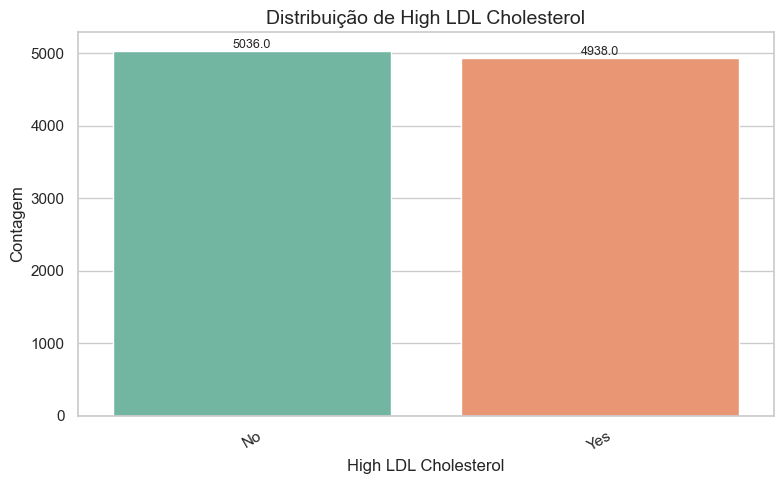

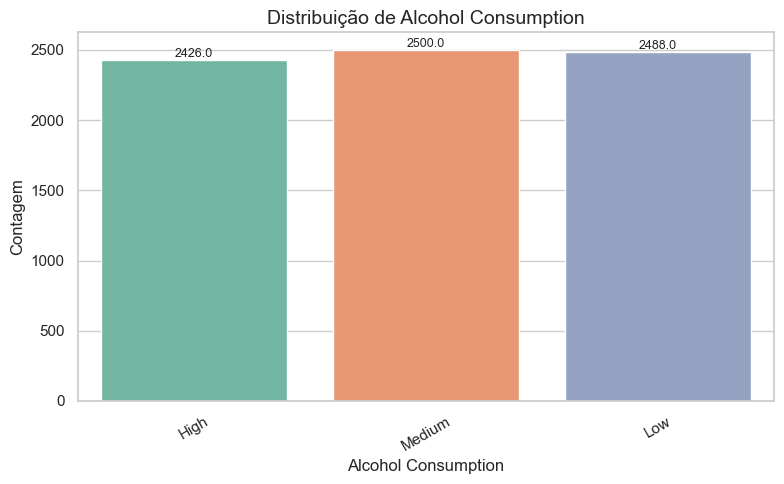

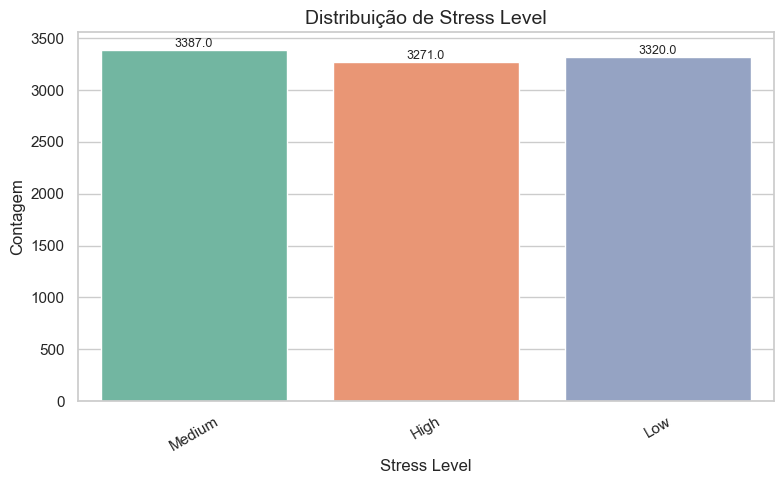

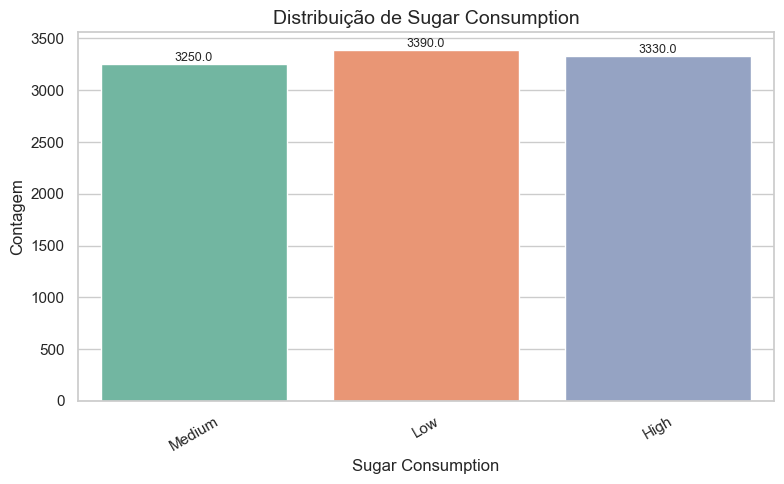

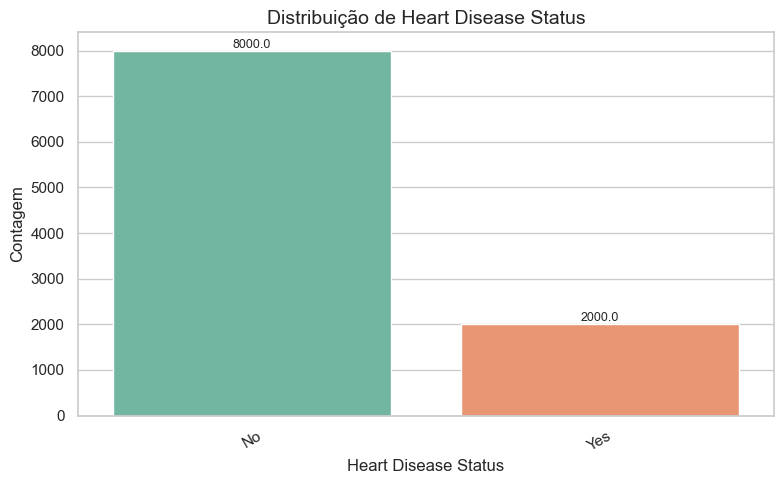

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for col in cat_cols:
    plt.figure(figsize=(8, 5))

    ax = sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


## Box plot
Importante porque permite visualizar rapidamente a distribuição, mediana, dispersão e valores extremos (outliers) de uma variável numérica, especialmente ao compará-la entre diferentes categorias. Ele ajuda a identificar padrões, assimetrias e possíveis anomalias nos dados de forma clara e compacta.

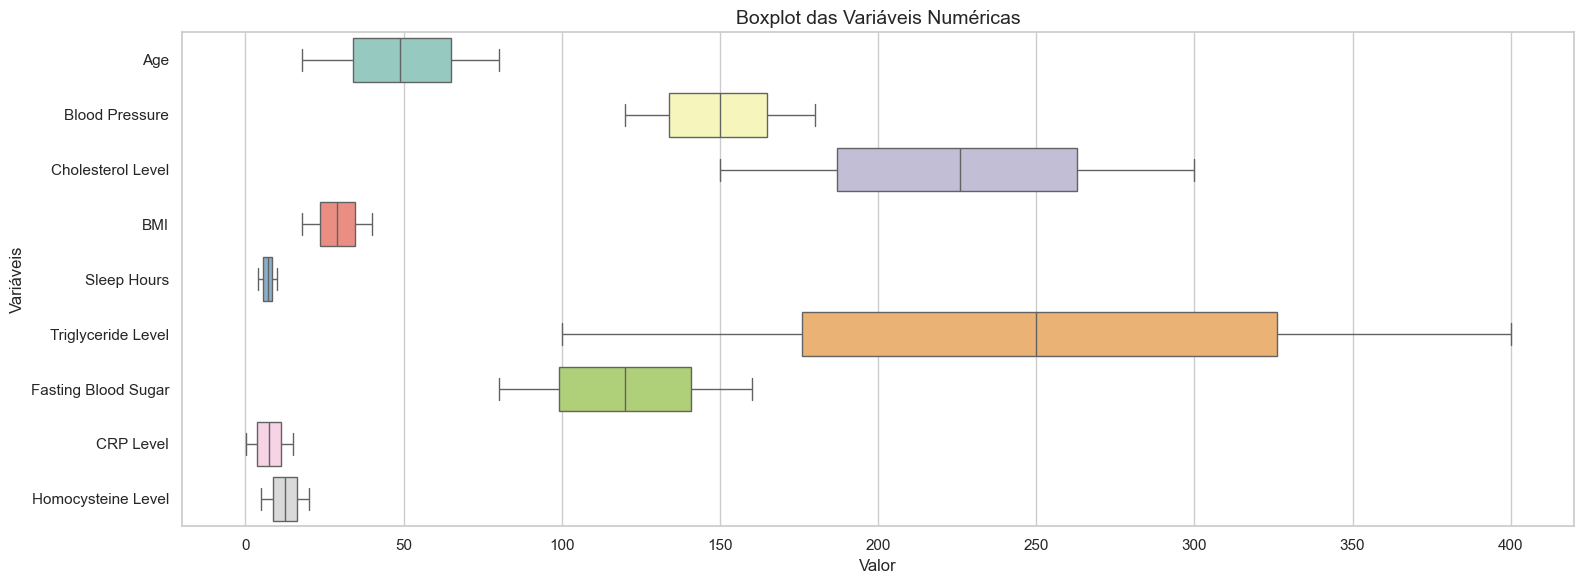

In [11]:
num_cols = df.select_dtypes(include=["number"]).columns
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.boxplot(data=df[num_cols], orient='h', palette="Set3")

plt.title("Boxplot das Variáveis Numéricas", fontsize=14)
plt.xlabel("Valor")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

# 2. PRÉ-PROCESSAMENTO
---


## Transformação das variáveis categóricas
Precisamos transformar variáveis categóricas em numéricas no pré-processamento porque os modelos só lidam com números.

In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns


label_mappings = {}


df_encoded = df.copy()


for col in categorical_cols:
    le = LabelEncoder()
    not_null_mask = df_encoded[col].notna()

    df_encoded.loc[not_null_mask, col] = le.fit_transform(df_encoded.loc[not_null_mask, col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print("Data info após Label Encoding:")
print(df_encoded.info())

print("\nMapeamento de categorias:")
for col, mapping in label_mappings.items():
    print(f"\n→ {col}")
    for code, label in enumerate(mapping):
        print(f"  {code} → {label}")


Data info após Label Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   fl

## Tratamento de registros nulos
Como não detectamos nenhum registros duplicados, não é necessário realizar tratamento nesse ponto. Porém encontramos diversos valores nulos. Para tratá-los de forma mais eficiente, utilizaremos o KNNImputer do Scikit-learn, que preenche os dados ausentes com base na similaridade entre os registros — estimando os valores faltantes a partir dos k vizinhos mais próximos, de maneira mais precisa do que métodos simples como média ou mediana.


In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_imputed = df_encoded.copy()
df_imputed[df_imputed.columns] = imputer.fit_transform(df_imputed)

if df_imputed.isnull().sum().sum() == 0:
    print("Todos os valores nulos foram preenchidos com sucesso.")
else:
    print("Ainda existem valores nulos no conjunto de dados.")
    print(df_imputed.isnull().sum())


Todos os valores nulos foram preenchidos com sucesso.


## Renomeação de campos

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Novos nomes das colunas:")
print(df.columns.tolist())

Novos nomes das colunas:
['age', 'gender', 'blood_pressure', 'cholesterol_level', 'exercise_habits', 'smoking', 'family_heart_disease', 'diabetes', 'bmi', 'high_blood_pressure', 'low_hdl_cholesterol', 'high_ldl_cholesterol', 'alcohol_consumption', 'stress_level', 'sleep_hours', 'sugar_consumption', 'triglyceride_level', 'fasting_blood_sugar', 'crp_level', 'homocysteine_level', 'heart_disease_status']


## Análise de Distribuição dos Dados
Importante porque ajuda a entender o comportamento de cada variável numérica, identificar assimetrias, colunas com distribuição normal ou enviesada e ajuda a detectar outliers.


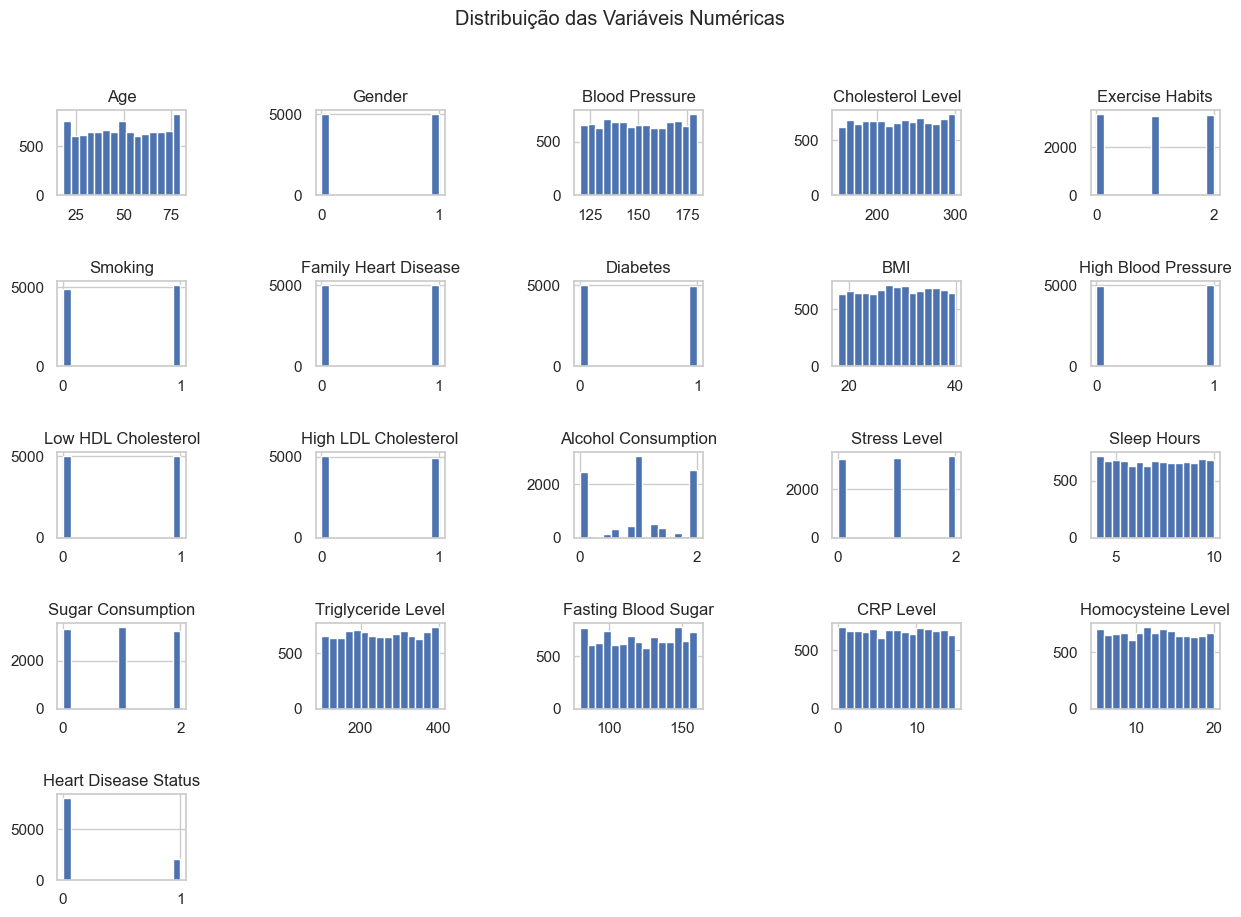

In [15]:
num_cols = df_imputed.select_dtypes(include=['number']).columns

df_imputed[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

## Analise de Correlação

In [16]:
corr_matrix = df_imputed.corr().round(3)
print("Correlação absoluta com 'Heart Disease Status' (ordenada):\n")
print(corr_matrix["Heart Disease Status"].abs().sort_values(ascending=False))

Correlação absoluta com 'Heart Disease Status' (ordenada):

Heart Disease Status    1.000
BMI                     0.020
Stress Level            0.017
Gender                  0.016
Blood Pressure          0.014
Sugar Consumption       0.011
Alcohol Consumption     0.011
Age                     0.009
High LDL Cholesterol    0.008
Homocysteine Level      0.008
Family Heart Disease    0.007
CRP Level               0.006
Low HDL Cholesterol     0.006
Sleep Hours             0.004
Diabetes                0.003
Exercise Habits         0.003
Cholesterol Level       0.003
Triglyceride Level      0.003
High Blood Pressure     0.002
Smoking                 0.002
Fasting Blood Sugar     0.002
Name: Heart Disease Status, dtype: float64


In [17]:
selected_features_for_knn = ['BMI', 'Stress Level', 'Gender', 'Blood Pressure', 'Sugar Consumption', 'Alcohol Consumption', 'Age', 'Homocysteine Level', 'High LDL Cholesterol', 'Family Heart Disease', 'CRP Level', 'Low HDL Cholesterol']
df_selected_features = df_imputed[selected_features_for_knn].copy()
display(df_selected_features.head())

,BMI,Stress Level,Gender,Blood Pressure,Sugar Consumption,Alcohol Consumption,Age,Homocysteine Level,High LDL Cholesterol,Family Heart Disease,CRP Level,Low HDL Cholesterol
0,24.991591,2.0,1.0,153.0,2.0,0.0,56.0,12.387250,0.0,1.0,12.969246,1.0
1,25.221799,0.0,0.0,146.0,2.0,2.0,69.0,19.298875,0.0,1.0,9.355389,1.0
2,29.855447,1.0,1.0,126.0,1.0,1.0,46.0,11.230926,1.0,0.0,12.709873,1.0
3,24.130477,0.0,0.0,122.0,0.0,1.0,32.0,5.961958,1.0,1.0,12.509046,0.0
4,20.486289,0.0,1.0,166.0,0.0,1.0,60.0,8.153887,0.0,1.0,10.381259,0.0


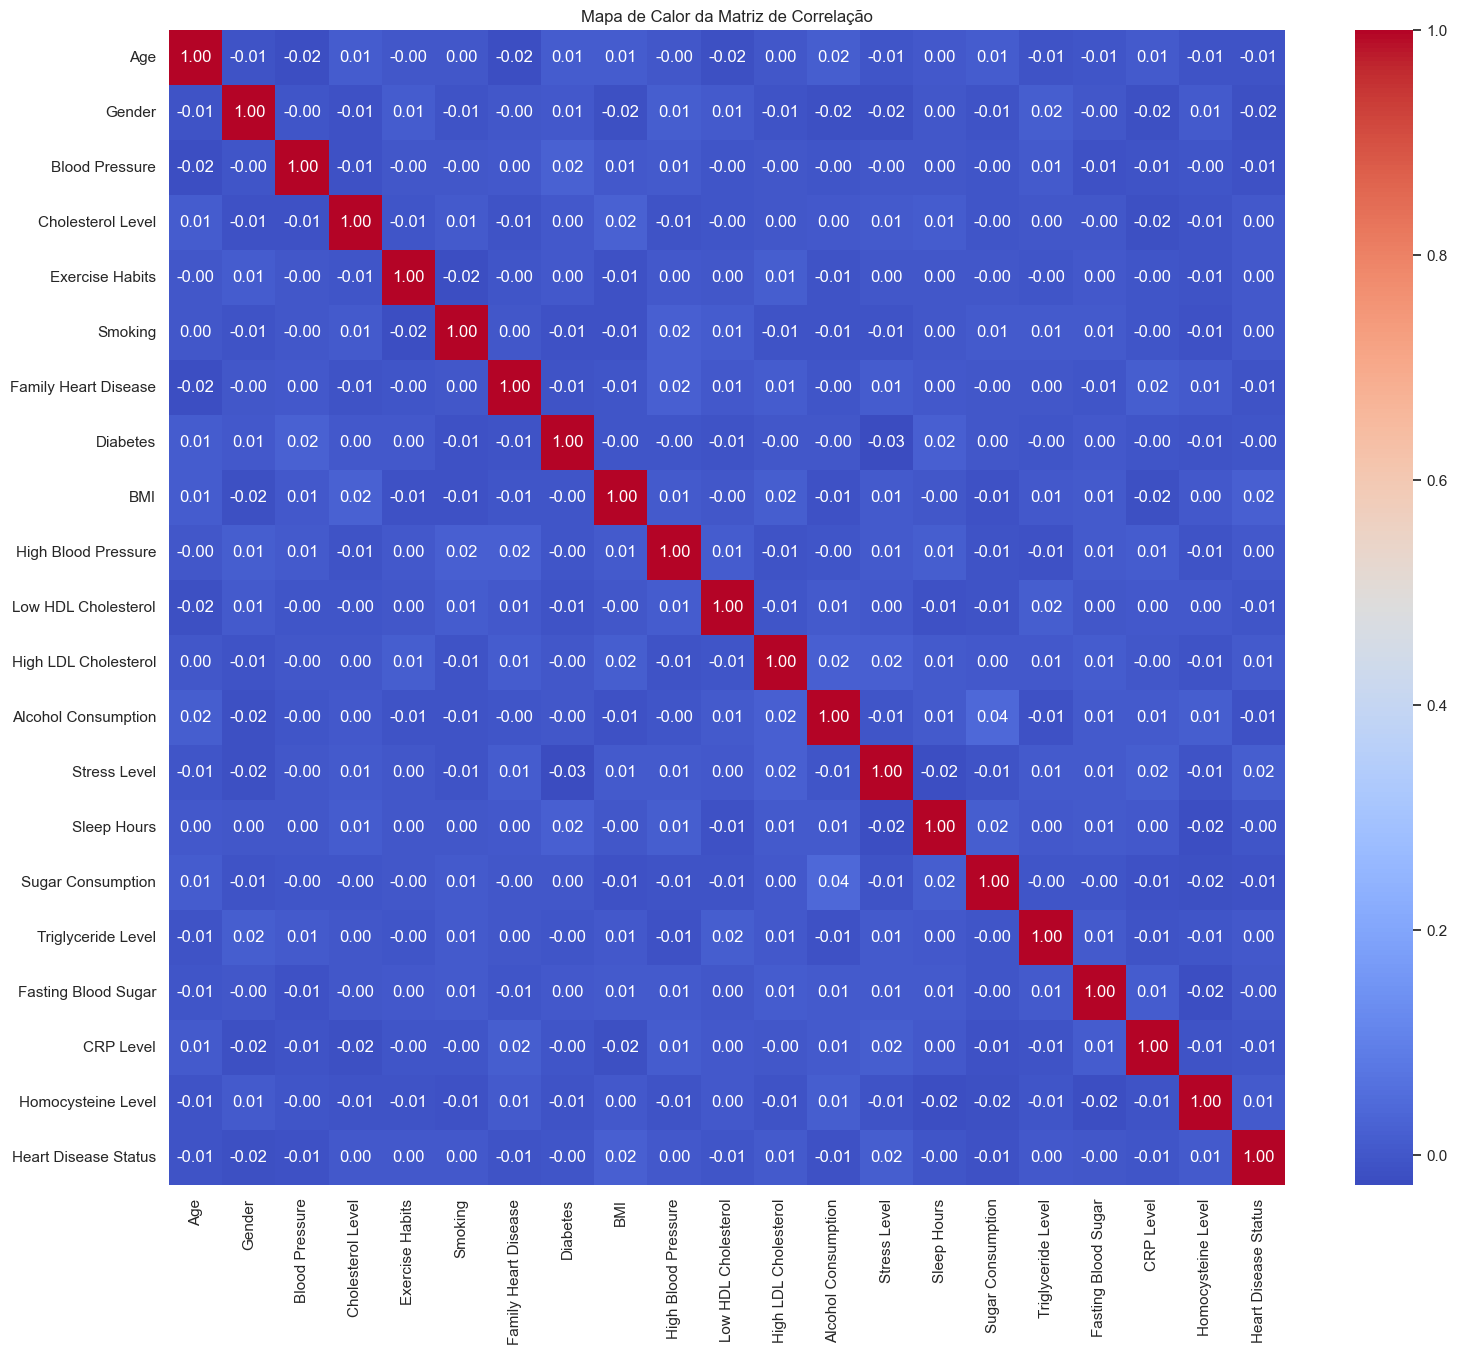

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_imputed.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

### Observações da Matriz de Correlação


*   **`heart_disease_status`:**
    *   Tem uma correlação positiva muito fraca com `stress_level` (0.02) e `bmi` (0.02), sugerindo que níveis de estresse e IMC ligeiramente mais altos podem estar associados a um risco um pouco maior de doença cardíaca.
    * Apesar disso todos os dados não possuem uma forte correlação um com outro*

*   **Relações Esperadas:**
    *   Observamos uma correlação positiva, ainda que muito fraca, entre `high_blood_pressure` (pressão alta) e `blood_pressure` (níveis de pressão arterial), o que é uma relação esperada.

*   **Relações Inesperadas:**
    *   A correlação entre `diabetes` e `fasting_blood_sugar` (açúcar no sangue em jejum) é quase nula. Isso pode sugerir que outros fatores, além do açúcar no sangue em jejum, são mais influentes no diagnóstico de diabetes neste conjunto de dados.


# 3. MODELAGEM DE DADOS
---

## Lidando com a disparidade de dados

Como temos essa disparidade vamos usar O SMOTE que é uma técnica que cria novas amostras sintéticas da classe minoritária para equilibrar o conjunto de dados, o que ajuda a reduzir o vício do modelo e a melhorar sua capacidade de prever corretamente a classe com menos amostras.





Distribuição das classes antes do SMOTE:
Heart Disease Status
0.0    6400
1.0    1600
Name: count, dtype: int64

Distribuição das classes depois do SMOTE:
Heart Disease Status
0.0    6400
1.0    6400
Name: count, dtype: int64


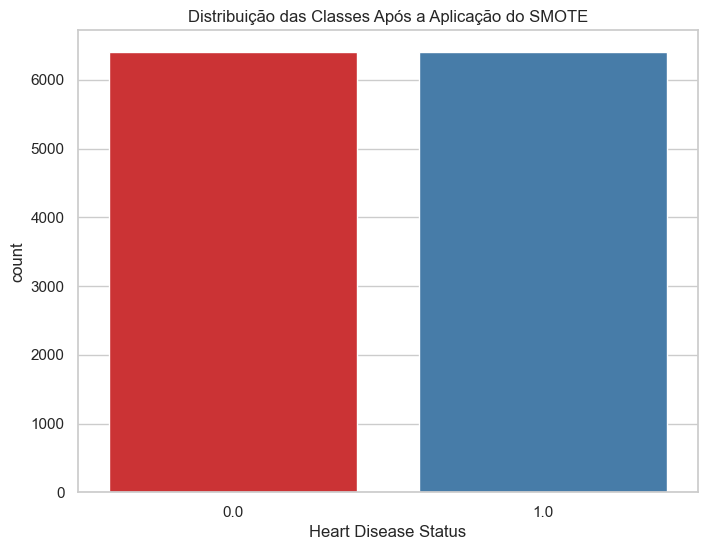

In [19]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X = df_imputed.drop('Heart Disease Status', axis=1)
y = df_imputed['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribuição das classes antes do SMOTE:")
print(y_train.value_counts())

print("\nDistribuição das classes depois do SMOTE:")
print(y_train_resampled.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='Set1', legend=False)
plt.title('Distribuição das Classes Após a Aplicação do SMOTE')
plt.show()

# 4. TREINAMENTO E AVALIAÇÃO DO MODELO
---

## Descobrindo qual valor K mais adequada

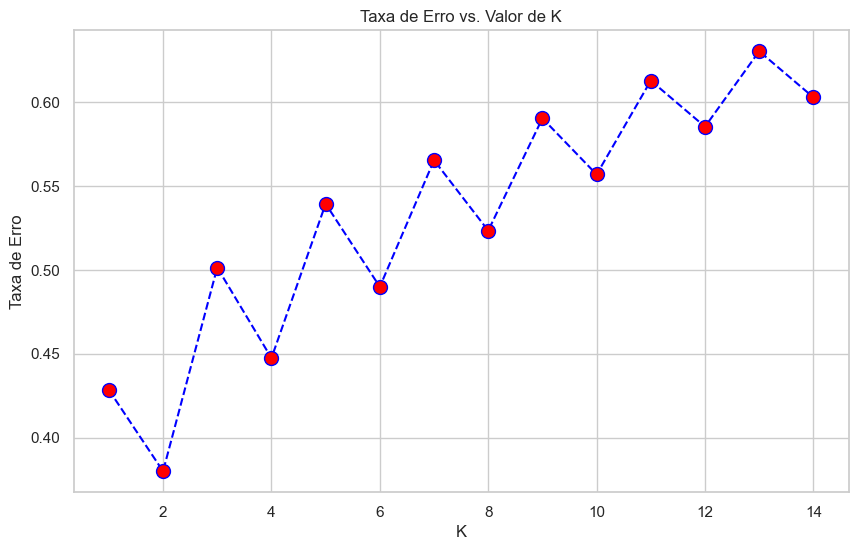

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

error = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train_resampled)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
plt.show()

## Aplicando KNN
---

Acuracia: 0.62

Relatório de Classificação do KNN:
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75      1600
         1.0       0.19      0.28      0.23       400

    accuracy                           0.62      2000
   macro avg       0.50      0.49      0.49      2000
weighted avg       0.68      0.62      0.64      2000



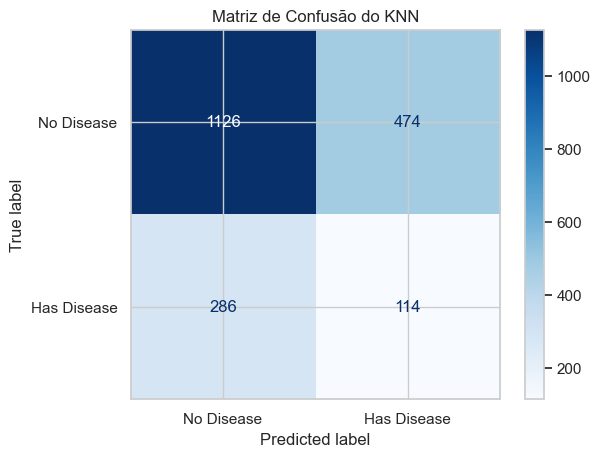

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_standard = KNeighborsClassifier(n_neighbors=2)
model_standard.fit(X_train_scaled, y_train_resampled)

y_pred_standard = model_standard.predict(X_test_scaled)

accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f'Acuracia: {accuracy_standard:.2f}')

print("\nRelatório de Classificação do KNN:")
print(classification_report(y_test, y_pred_standard))

cm = confusion_matrix(y_test, y_pred_standard)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Has Disease'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do KNN')
plt.show()


## Aplicando SVM
---

Acurácia do Linear SVM: 0.50

Relatório de Classificação do Linear SVM:
              precision    recall  f1-score   support

         0.0       0.78      0.53      0.63      1600
         1.0       0.18      0.42      0.25       400

    accuracy                           0.50      2000
   macro avg       0.48      0.47      0.44      2000
weighted avg       0.66      0.50      0.55      2000



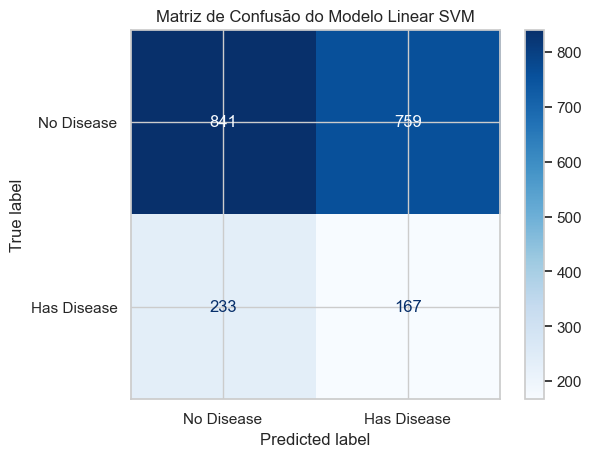

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

linear_svc = LinearSVC(C=1, random_state=42)
linear_svc.fit(X_train_scaled, y_train_resampled)

y_predito_svm = linear_svc.predict(X_test_scaled)


accuracy_svm = accuracy_score(y_test, y_predito_svm)
print(f"Acurácia do Linear SVM: {accuracy_svm:.2f}")

print("\nRelatório de Classificação do Linear SVM:")
print(classification_report(y_test, y_predito_svm))

cm_svm = confusion_matrix(y_test, y_predito_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['No Disease', 'Has Disease'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Modelo Linear SVM')
plt.show()

## Aplicando Decision tree
---


Accuracy of Decision Tree Model: 0.66

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      1600
         1.0       0.19      0.22      0.20       400

    accuracy                           0.66      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.68      0.66      0.67      2000



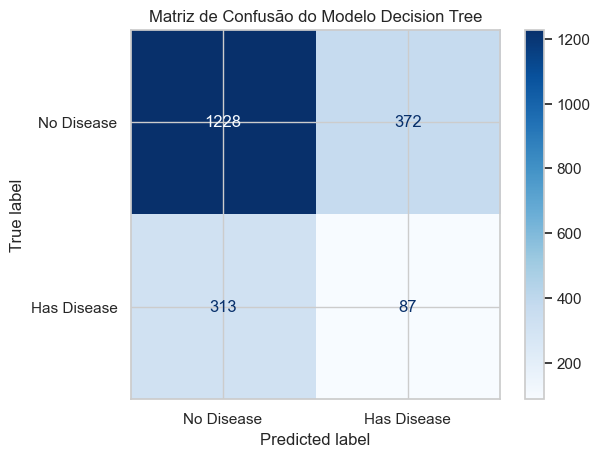

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train_resampled)

y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree Model: {accuracy_dt:.2f}')

print("\nClassification Report for Decision Tree Model:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Disease', 'Has Disease'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Modelo Decision Tree')
plt.show()

## Aplicando Logistic Regression
---


Accuracy of Logistic Regression Model: 0.50

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

         0.0       0.78      0.53      0.63      1600
         1.0       0.18      0.41      0.25       400

    accuracy                           0.50      2000
   macro avg       0.48      0.47      0.44      2000
weighted avg       0.66      0.50      0.55      2000



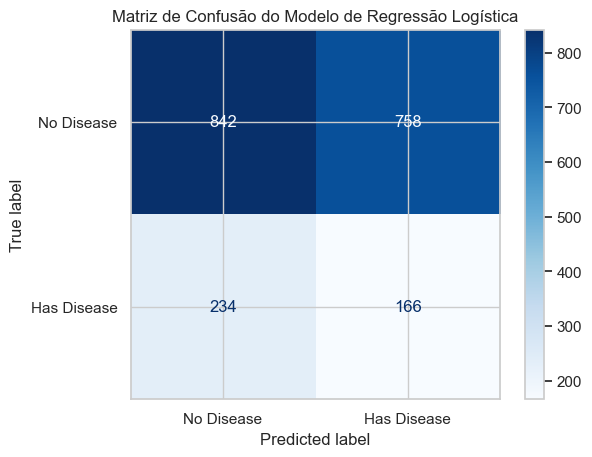

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_scaled, y_train_resampled)

y_pred_lr = lr_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy of Logistic Regression Model: {accuracy_lr:.2f}')

print("\nClassification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Disease', 'Has Disease'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Modelo de Regressão Logística')
plt.show()

# 5. COMPARAÇÃO DE MODELOS E INSIGHTS
---

## Comparação dos Modelos

Avaliamos quatro modelos de classificação para prever o risco de doença cardíaca: KNN, Linear SVM , Decision Tree e Logistic Regression. A métrica principal utilizada para comparação foi a acurácia juntamento com o recall no conjunto de teste.

| Modelo             | Acurácia | Precisão (Classe 'Yes') | Recall (Classe 'Yes') | F1-Score (Classe 'Yes') |
|--------------------|----------|-------------------------|-----------------------|-------------------------|
| KNN (K=2)          | 0.62     | 0.19                    | 0.28                  | 0.23                    |
| Linear SVM         | 0.50     | 0.18                    | 0.42                  | 0.25                    |
| Decision Tree      | 0.66     | 0.19                    | 0.22                  | 0.20                    |
| Logistic Regression| 0.50     | 0.18                    | 0.41                  | 0.25                    |

**Observações:**

*   A **Decision Tree** obteve a maior acurácia geral (0.66), seguida pelo KNN (0.62).
*   No entanto, ao analisar as métricas para a classe minoritária ('Yes' - ter doença cardíaca), todos os modelos apresentaram **baixa precisão e recall**. Isso indica que eles têm dificuldade em identificar corretamente os casos positivos (pessoas com doença cardíaca) e frequentemente os classificam como negativos.
*   Apesar da aplicação do SMOTE para rebalancear o conjunto de treino, essa dificuldade em prever a classe minoritária persiste no conjunto de teste.
*   O **Linear SVM** e a **Regressão Logística** apresentaram resultados semelhantes e acurácia mais baixa comparados a Decision Tree e KNN.

## Insights

Com base na análise exploratória e nos resultados dos modelos, podemos destacar os seguintes insights:

1.  **Desbalanceamento da Variável Alvo:** O dataset possui um desbalanceamento significativo, com a maioria dos registros representando a ausência de doença cardíaca. Isso é um desafio para a modelagem e explica em parte a dificuldade dos modelos em prever a classe minoritária.
2.  **Valores Ausentes:** A coluna `Alcohol Consumption` apresenta um grande número de valores ausentes, o que pode ter impactado a análise e a modelagem, apesar da imputação por KNN.
3.  **Baixa Correlação com a Variável Alvo:** A análise de correlação mostrou que a maioria das variáveis tem uma correlação muito baixa com o `Heart Disease Status`. As correlações mais altas (ainda que fracas) foram com `BMI`, `Stress Level` e `Gender`. Isso sugere que o risco de doença cardíaca neste dataset pode ser influenciado por uma combinação complexa de fatores, e não por variáveis isoladas com alta correlação linear.
4.  **Performance do Modelo:** Embora a Decision Tree tenha a melhor acurácia geral, a baixa performance na identificação de casos positivos ('Yes') é uma limitação importante.
